In [1]:
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython import display
from IPython.display import clear_output

from sklearn.model_selection import train_test_split

from cycle_gan import *
%load_ext autoreload
%autoreload 2

## Loading Dataset

In [2]:
cities = ['la', 'bos', 'nyc', 'chi', 'sp', 'bue',
          'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']

cities = ['la']

dates = ['winter']

zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights_new/'
checkpoint_name = 'cycle_gan_la_check'
checkpoint_path = 'training_checkpoints/%s' % (checkpoint_name)


TILES_PER_CITY = 50
BATCH_SIZE = 1

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
train_height, test_height, train_shadow, test_shadow = get_train_test(height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE)

In [5]:
sample_height = next(iter(train_height))
sample_shadow = next(iter(train_shadow))

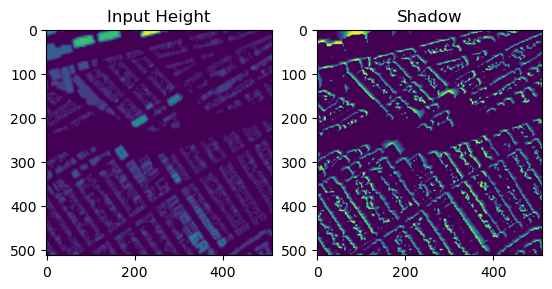

In [6]:
plt.subplot(121)
plt.title('Input Height')
plt.imshow(sample_height[0][0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Shadow')
plt.imshow(sample_height[1][0] * 0.5 + 0.5)

plt.savefig('height_shadow.png')

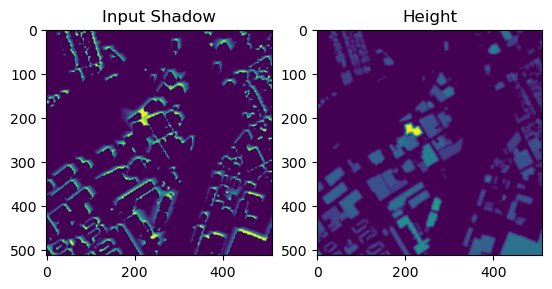

In [10]:
plt.subplot(121)
plt.title('Input Shadow')
plt.imshow(sample_shadow[0][0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Height')
plt.imshow(sample_shadow[1][0] * 0.5 + 0.5)

## Build generator and discriminator

In [6]:
cycle_gan = CycleGAN(512, 512)

## Generate Images

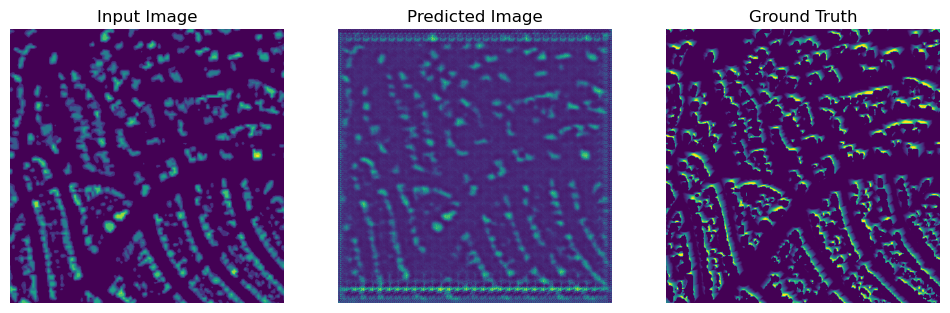

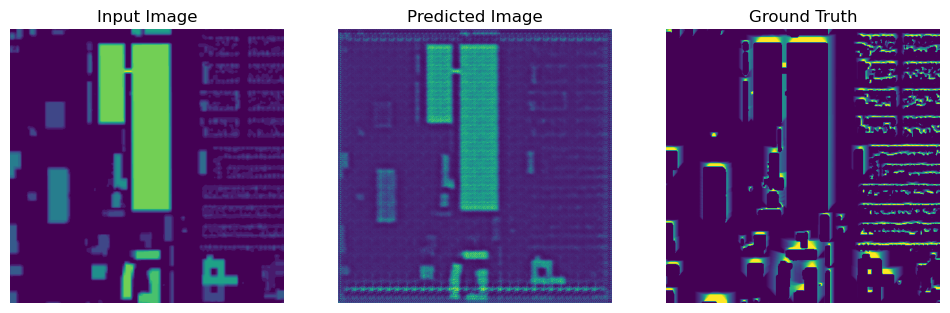

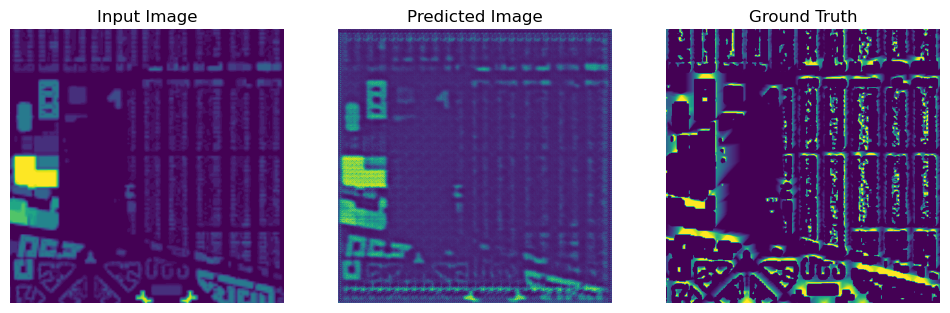

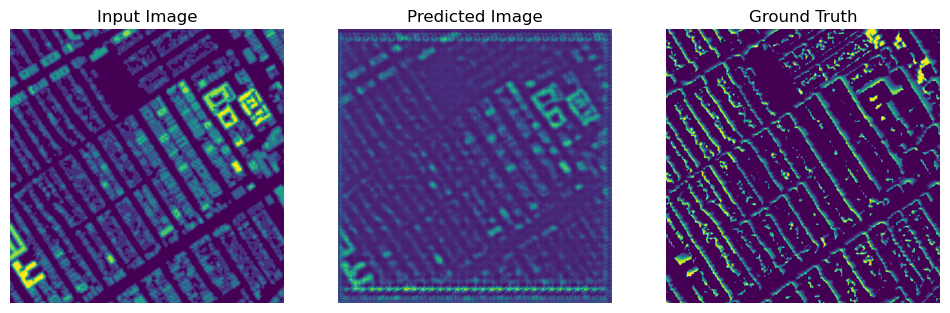

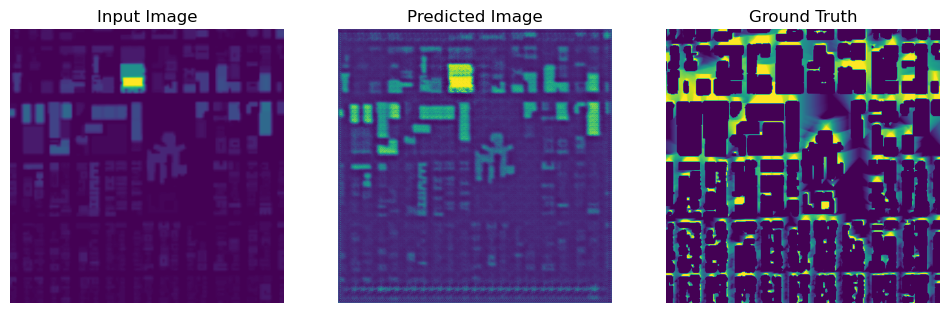

In [17]:
# Run the trained model on the test dataset
for inp in test_height.take(5):
  generate_images(cycle_gan.generator_g, inp)

## Training

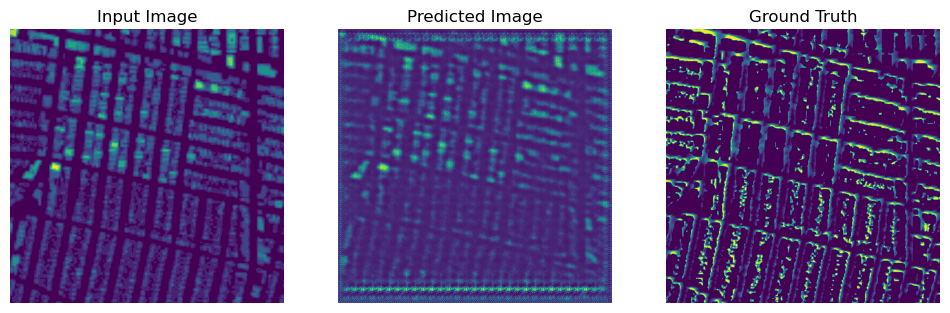

Time taken for epoch 1 is 36.85311460494995 sec

Saving checkpoint for epoch 1 at training_checkpoints/cycle_gan_la_check\ckpt-1


In [6]:
cycle_gan.fit(checkpoint_path, train_height, train_shadow, 200)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs --port 8089

In [7]:
rmses, maes, mses = get_metrics(test_height, cycle_gan.generator_g)
    
print(np.average(rmses), np.average(maes))
df = pd.DataFrame({'rmse': rmses, 'mae': maes})

filepath = 'results/%s-%d.csv'%(checkpoint_name,zoom)
if not os.path.exists(os.path.dirname(filepath)):
    os.mkdir(os.path.dirname(filepath))
        
df.to_csv(filepath, index=False, header=True)

0.2846884 0.20860091


### Restore the latest checkpoint of the stored model

In [14]:
cycle_gan.restore(checkpoint_path)